In [1]:
import os
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
from des_tools import plotlib
import getdist
from getdist import plots

In [4]:
FTYPE='png'
KDESMOOTH=0.5

# where to find chains
chaindir = os.path.relpath("cosmosis-chains")
# where to put plots
plotdir = chaindir

# dictionary translating cosmosis parameter labels to latex labels
paramlabels = plotlib.DEFAULT_PLABELS

reload(plotlib)
chains = {}

# associating short tags with filenames, chains, labels and filenames for chains.
filedict = {
	'3x2pt': 'des-y3-3x2pt.txt',
	'shear': 'des-y3-shear.txt',
}

# What will be in plot legends
labeldict = {
	'3x2pt': '3x2pt',
	'shear': r'$\xi_{\pm}$',
}
   
for k in filedict.keys():
    # dictionary will hold getdist MCSamples objects;
    # if there was an error in reading in file, entry will be None
    fname = filedict[k]
    chains[k] = plotlib.prep_chain(fname, labeldict[k], kdesmooth=KDESMOOTH, paramlabels=paramlabels, chaindir=chaindir)
    chains[k].updateRenames({"cosmological_parameters--omega_m": "omegam", "cosmological_parameters--sigma_8": "sigma8"})
    if chains[k] is None: print(f"WARNING: could not load chain at {fname}")

...getting data from  des-y3-3x2pt.txt
...adding chain for 3x2pt , samples have shape (10143, 41)
isIS=False
Removed no burn in
...getting data from  des-y3-shear.txt
...adding chain for $\xi_{\pm}$ , samples have shape (3509, 29)
isIS=False
Removed no burn in


In [3]:
chains_cocoa = {}
for code in [100, 101, 102, 103, 104, 105, 106]:
	chain = getdist.loadMCSamples(f"./chains/maglim_new/MCMC{code}")
	chain.removeBurn(0.6)
	chain.addDerived(chain['sigma8'] * np.sqrt(chain['omegam']/0.3), name="S8", label="S_8")
	chains_cocoa[code] = chain

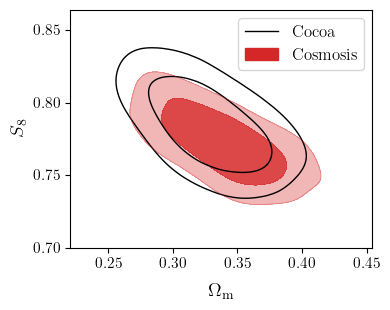

In [10]:
p = plots.get_subplot_plotter(width_inch=5, subplot_size=3, subplot_size_ratio=8/10)
p.settings.scaling = False # prevent scaling down font sizes even though small subplots
p.settings.figure_legend_frame = False
p.plot_2d(
	[chains_cocoa[100], chains["3x2pt"]],
	"omegam",
	"S8",
	filled=[False, True],
	colors=["black", "tab:red"]
)
p.add_legend(["Cocoa", "Cosmosis"])
p.export("./Figures/cocoa_cosmosis_comparison_3x2pt.pdf")

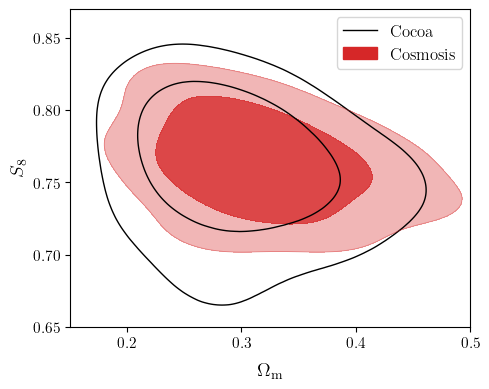

In [14]:
p = plots.get_subplot_plotter(width_inch=5, subplot_size=3, subplot_size_ratio=8/10)
p.settings.scaling = False # prevent scaling down font sizes even though small subplots
p.settings.figure_legend_frame = False
p.plot_2d(
	[chains_cocoa[101], chains["shear"]],
	"omegam",
	"S8",
	filled=[False, True],
	colors=["black", "tab:red"],
	lims=[0.15, 0.5, 0.65, 0.87]
)
p.add_legend(["Cocoa", "Cosmosis"])
p.export("./Figures/cocoa_cosmosis_comparison_shear.pdf")